## Torch implementation of the complex ERF

Here we breiefely show how to use the torch_erf package to compute the ERF of a complex-valued function. 

The implementation is based on the paper:

Weideman, J. Andre C. "Computation of the complex error function." SIAM Journal on Numerical Analysis 31.5 (1994): 1497-1518

and passes trough the computation of the Faddeeva function.

### Comparison between torch and scipy implementations

The following block show the perfomance of the current implementation with respect to the scipy.special.erf (which uses a more sophisticated algorithm).

#### Imports

In [6]:
from torch_erf.ERF import ERF_1994
import torch
from scipy.special import erf as scipy_erf
from scipy.special import erfi as scipy_erfi
import numpy as np
import matplotlib.pyplot as plt

#### Data generation

In [7]:
limits = 1.5
sampling_size = 1000+1

x = np.linspace(-limits, limits, sampling_size)
y = np.linspace(-limits, limits, sampling_size)

def cmod(z):
    return np.sqrt(z.real**2 + z.imag**2)

X, Y = np.meshgrid(x, y)

C = X + 1j*Y

#### Layer definition and computation

In [8]:
# create a torch ERF layer and load it to the GPU
erf_torch = ERF_1994(128).cuda()

n_times = 100

# register computation times
import time
t0 = time.time()
for i in range(n_times):
    out_torch = erf_torch(torch.tensor(C).cuda()).detach().cpu().numpy()
t1 = time.time()
print("torch GPU time: ", t1-t0)

t0 = time.time()
for i in range(n_times):
    out_scipy = torch.tensor(scipy_erf(C))
t1 = time.time()
print("scipy time: ", t1-t0)

torch GPU time:  4.663437843322754
scipy time:  15.80204463005066


### Plotting results

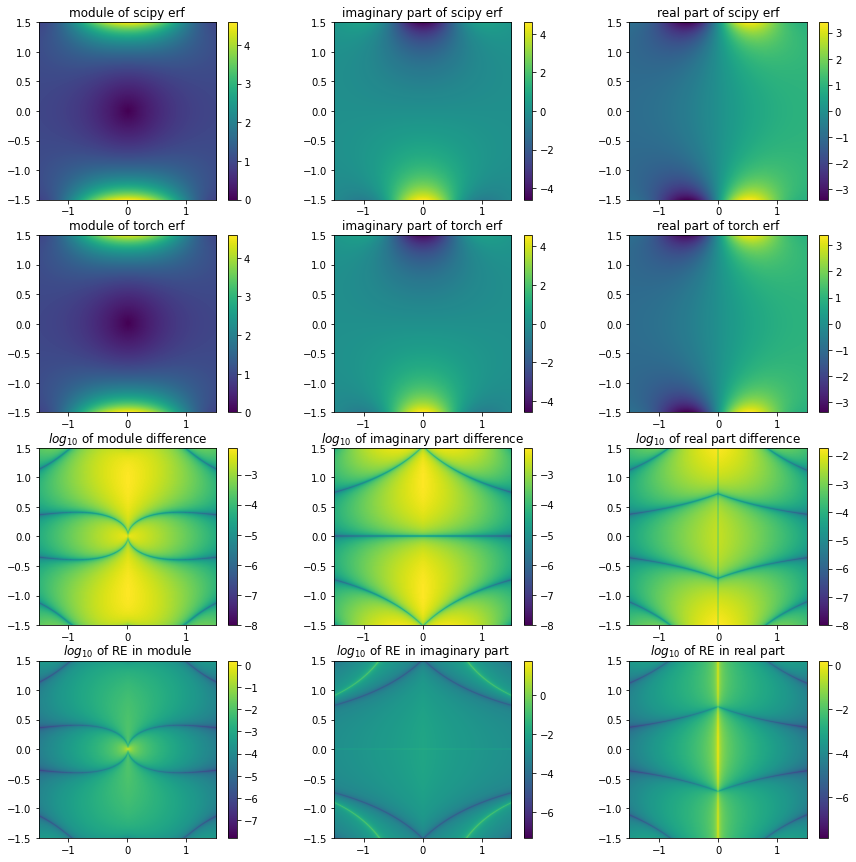

In [9]:
# plotting

fig, ax = plt.subplots(4, 3, figsize=(15, 15))

im = ax[0, 0].imshow(cmod(out_scipy), extent=[-limits, limits, -limits, limits])
ax[0, 0].set_title("module of scipy erf")
plt.colorbar(im, ax=ax[0, 0])
im = ax[0, 1].imshow(out_scipy.imag, extent=[-limits, limits, -limits, limits])
ax[0, 1].set_title("imaginary part of scipy erf")
plt.colorbar(im, ax=ax[0, 1])
im = ax[0, 2].imshow(out_scipy.real, extent=[-limits, limits, -limits, limits])
ax[0, 2].set_title("real part of scipy erf")
plt.colorbar(im, ax=ax[0, 2])

im = ax[1, 0].imshow(cmod(out_torch), extent=[-limits, limits, -limits, limits])
ax[1, 0].set_title("module of torch erf")
plt.colorbar(im, ax=ax[1, 0])
im = ax[1, 1].imshow(out_torch.imag, extent=[-limits, limits, -limits, limits])
ax[1, 1].set_title("imaginary part of torch erf")
plt.colorbar(im, ax=ax[1, 1])
im = ax[1, 2].imshow(out_torch.real, extent=[-limits, limits, -limits, limits])
ax[1, 2].set_title("real part of torch erf")
plt.colorbar(im, ax=ax[1, 2])

# errors
eps = 1e-8
im = ax[2, 0].imshow(np.log10(np.abs(cmod(out_scipy) - cmod(out_torch)) + eps), extent=[-limits, limits, -limits, limits])
ax[2, 0].set_title("$log_{10}$ of module difference")
plt.colorbar(im, ax=ax[2, 0])
im = ax[2, 1].imshow(np.log10(np.abs(out_scipy.imag - out_torch.imag) + eps), extent=[-limits, limits, -limits, limits])
ax[2, 1].set_title("$log_{10}$ of imaginary part difference")
plt.colorbar(im, ax=ax[2, 1])
im = ax[2, 2].imshow(np.log10(np.abs(out_scipy.real - out_torch.real) + eps), extent=[-limits, limits, -limits, limits])
ax[2, 2].set_title("$log_{10}$ of real part difference")
plt.colorbar(im, ax=ax[2, 2])

# errors
eps = 1e-8
im = ax[3, 0].imshow(np.log10(np.abs(cmod(out_scipy) - cmod(out_torch)) + eps) - np.log10(np.abs(cmod(out_scipy) + eps)), extent=[-limits, limits, -limits, limits])
ax[3, 0].set_title("$log_{10}$ of RE in module")
plt.colorbar(im, ax=ax[3, 0])
im = ax[3, 1].imshow(np.log10(np.abs(out_scipy.imag - out_torch.imag) + eps) - np.log10(np.abs(out_scipy.imag) + eps), extent=[-limits, limits, -limits, limits])
ax[3, 1].set_title("$log_{10}$ of RE in imaginary part")
plt.colorbar(im, ax=ax[3, 1])
im = ax[3, 2].imshow(np.log10(np.abs(out_scipy.real - out_torch.real) + eps) - np.log10(np.abs(out_scipy.real) + eps), extent=[-limits, limits, -limits, limits])
ax[3, 2].set_title("$log_{10}$ of RE in real part")
plt.colorbar(im, ax=ax[3, 2])

#fig.suptitle("Comparison of scipy and torch erf implementations", fontsize=24)


#error = np.log(cmod(out_scipy)-cmod(out_torch)) - np.log(cmod(out_scipy))

#plt.imshow(error)
#plt.colorbar()

#### 3D view

Text(0.5, 0.92, 'Real value of torch erf')

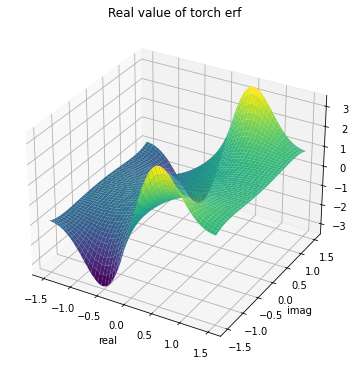

In [11]:
# 3d plot 
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(6, 12))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, out_torch.real, cmap='viridis')
ax.set_xlabel('real')
ax.set_ylabel('imag')
ax.set_zlabel('z')
ax.set_title("Real value of torch erf")

Text(0.5, 0.92, 'Real value of scipy erf')

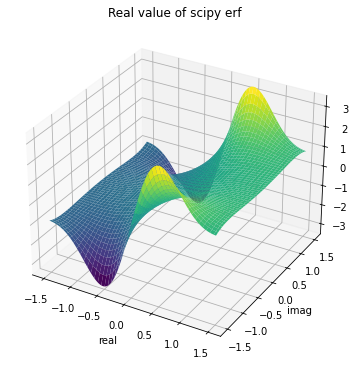

In [12]:
# 3d plot 
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(6, 12))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, out_scipy.real, cmap='viridis')
ax.set_xlabel('real')
ax.set_ylabel('imag')
ax.set_zlabel('z')
ax.set_title("Real value of scipy erf")

#### Real projection view

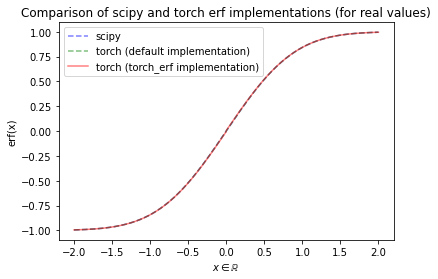

In [13]:
x = np.linspace(-2, 2, 1001)

plt.plot(x, scipy_erf(x).real, color = 'blue', linestyle='--', label='scipy', alpha=0.5)
plt.plot(x, torch.erf(torch.tensor(x)), color = 'green', linestyle='--', label='torch (default implementation)', alpha=0.5)
plt.plot(x, erf_torch(torch.tensor(x+0j)).real, color='red', label='torch (torch_erf implementation)', alpha=0.5)
plt.title("Comparison of scipy and torch erf implementations (for real values)", fontsize=12)
plt.ylabel("erf(x)")
plt.xlabel("$x \in \mathbb{R}$")
plt.legend()

#### Imaginary projection view

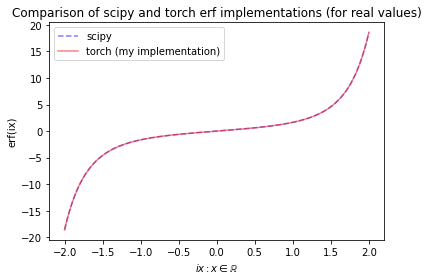

In [14]:
x = np.linspace(-2, 2, 1001)*1j

plt.plot(x.imag, scipy_erf(x).imag, color = 'blue', linestyle='--', label='scipy', alpha=0.5)
plt.plot(x.imag, erf_torch(torch.tensor(x)).imag, color='red', label='torch (my implementation)', alpha=0.5)
plt.title("Comparison of scipy and torch erf implementations (for real values)", fontsize=12)
plt.ylabel("erf(ix)")
plt.xlabel("$ix : x \in \mathbb{R}$")
plt.legend()

#### Derivative evaluation

Text(0.5, 0.98, 'Derivative of erf with the torch implementation')

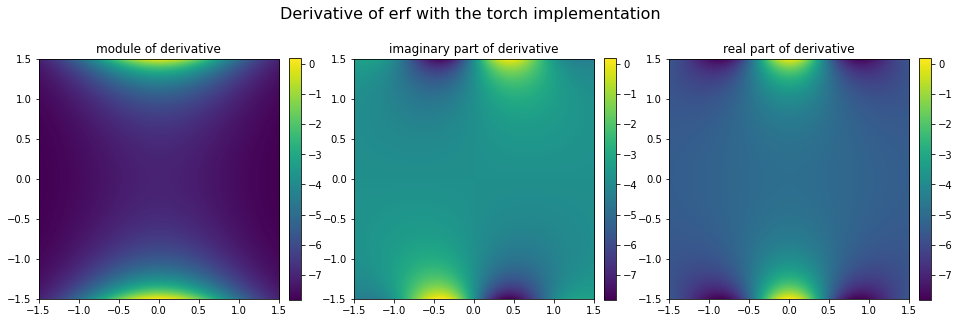

In [15]:
derivative = erf_torch.backward(torch.tensor(C))
img, ax = plt.subplots(1, 3, figsize=(16, 5))
ax[0].imshow(cmod(derivative), extent=[-limits, limits, -limits, limits])
ax[0].set_title("module of derivative")
plt.colorbar(im, ax=ax[0], fraction=0.046, pad=0.04)
ax[1].imshow(derivative.imag, extent=[-limits, limits, -limits, limits])
ax[1].set_title("imaginary part of derivative")
plt.colorbar(im, ax=ax[1], fraction=0.046, pad=0.04)
ax[2].imshow(derivative.real, extent=[-limits, limits, -limits, limits])
ax[2].set_title("real part of derivative")
plt.colorbar(im, ax=ax[2], fraction=0.046, pad=0.04)
plt.suptitle("Derivative of erf with the torch implementation", fontsize=16)
